# Capstone project proposal: Shelter Animal Outcome
 ##  Gauri Phatak
 ##  January 2017

## Domain Background

This data set is gathered from the Kaggle competition for Animal shelter outcomes for the city of Austin Texas.
Based on information form various sources cited below we know that about 8-12 million animals enter shelters every year. About 5-9 million of them are euthanized. Shelter intakes are divided about halfway for owner relinquishing the animal and those picked up by animal control. Using the Austin Shelter animal data set we can guage the trend in outcomes and predict the outcome for a particular animal which enters the shelter.

Supervised learning is a method used for predicting outcome for data based on a set of previous related data. Majority of practical machine learning currently is supervised learning. The function approximation can be noted as 
Y =f(x) Where x is the given data which contains different features describing the entry and Y is the outcome for that particular entry. f(x) is the function approximation which relates the given features to the outcome Y.

Classification is a subset of supervised learning. In our problem here, we are trying to predict a category not a number. Hence we use classification algorithms. We have to use multiclass classification algorithms since we have more than two outcomes for the dataset provided. 

I will be using a probablistic classification method. This will give us a probability for each outcome in the test set and we can evaluate it using logloss method metioned below.


## Motivation 
I was personally inspired to work on this project because having adopted two dogs and two cats from shelters and having volunteered in the shelter, it would give me a good idea of the fate of the animals in our care and maybe we can adjust the variables in favor of an animal getting adopted and finding a good home. Better prediciton of outcome for this data would give us an understanding of how the shelter system works.


## Datasets and inputs

In [33]:
import pandas  as pd
trainD = pd.read_csv("train.csv")

In [34]:
trainD.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


As we can see above the dataset has 10 different features. we can take a look at the description of each feature below.

In [35]:
print trainD.size
print trainD.describe()

267290
       AnimalID   Name             DateTime OutcomeType OutcomeSubtype  \
count     26729  19038                26729       26729          13117   
unique    26729   6374                22918           5             16   
top     A705677    Max  2015-08-11 00:00:00    Adoption        Partner   
freq          1    136                   19       10769           7816   

       AnimalType SexuponOutcome AgeuponOutcome                   Breed  \
count       26729          26728          26711                   26729   
unique          2              5             44                    1380   
top           Dog  Neutered Male         1 year  Domestic Shorthair Mix   
freq        15595           9779           3969                    8810   

              Color  
count         26729  
unique          366  
top     Black/White  
freq           2824  


Using describe function in pandas we can gather information of all the columns in a dataframe. We can see that AnimalID is a unique ID given to each Animal and it might not be useful for us to predict the outcome of the animal. Same with name we can see that there are 6374 unique names for 26729 animals. Date time gives the date and time for each animal. we have 5 different outcome types for the animals and 16 different outcome subtypes. 5 different sexupon outcome. The age column is very inconsistent, we can see that there are ages in days weeks , months and years. The color and breed of animal is also has more factors than we can handle. In this dataset, we are working with two types of anismals, namely, cats and dogs.
A lot of data wrangling has to happen on this dataset to make it usable for our project. The solution statement has more details on how the data will be seperated. 

Initial plot on distribution of outcomes for the animals

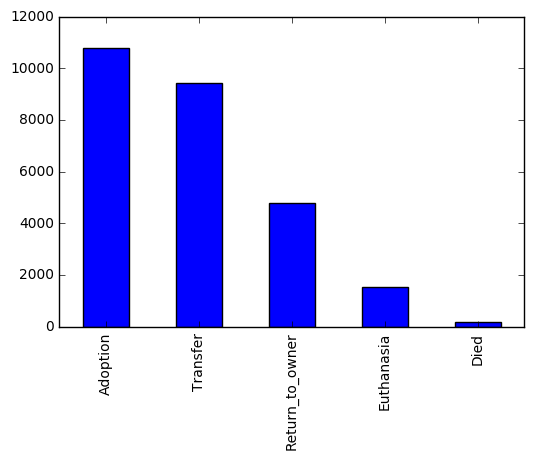

In [38]:
import matplotlib.pyplot as plt
trainD.OutcomeType.value_counts().plot(kind = 'bar')
plt.show()

We can see in the plot above that most of the animals in the dataset are adopted animals or transfered to another shelter. a sizeable number are returned to the owner. Unfortunately some of them have to be euthanised or they die. 

## Evaluation metrics
The evaluation metrics I will be using is the same as the one provided on the kaggle website.

Submissions are evaluated using the [multi-class logarithmic loss](https://www.kaggle.com/wiki/MultiClassLogLoss). Each incident has been labeled with one true class. For each animal, you must submit a set of predicted probabilities (one for every class). The formula is then,

logloss=−1N∑i=1N∑j=1Myijlog(pij),
logloss=−1N∑i=1N∑j=1Myijlog⁡(pij),
where N is the number of animals in the test set, M is the number of outcomes, \\(log\\) is the natural logarithm, \\(y_{ij}\\) is 1 if observation \\(i\\) is in outcome \\(j\\) and 0 otherwise, and \\(p_{ij}\\) is the predicted probability that observation \\(i\\) belongs to outcome \\(j\\).

Since this is a data set from a kaggle competition, I will be using one of the existing solutions provided on the leaderboard and measure the success of my solution against that.

## Requirements

Numpy

Matplotlib

Scikit-learn

Scipy

Python 2.7

Pandas

## Problem statement

Based on the training and test data made available by kaggle and Austin animal shelter, We need to predict if the animal in the shelter will be adopted, transfered, returned to owner, euthanised or dies.

This is a multiclass classification problem. We will need to find out the outcome for an animal based on the given features and data.

## Solution statement

The biggest issue to tackle in this dataset is the dataset itself. looking back at the summary of the dataset, we need to wrangle the features to extract useful information. Here is what I will be changing in each given feature.

AnimalID : This feature is not really useful since there are as many unique values here as there are animals. But one thing that caught my attention is for many of the value the first 3 characters of the id are same, maybe this indicates the animal shelter the animal is in. This can be something to filter in the dataset going further. We can get an idea of which shelter has a higher adoption rate as compared to others. This is a speculation and will need to be looked into in the analysis for a strong correlation.. 

Name : Name column entry is the given name of the animal either in or before the shelter. maybe we can distingush between animals which have names and which don't, since many animals don't have given names here. We can see if hvaing a name influences the outcome for the animal.

DateTime: This feature gives multiple information, the date i.e. the day month and year the animal is adopted and the time at which the adoption takes place. If we can seperate these values maybe we'll know what time in the day is best for an animal to get adopted also what day in the month or month in the year increases or decreases the chances of adoption.

OutcomeType: This is our Y value, the value we want to predict. It's a categorical variable and we do not want to make any changes to this. 

AnimalType: We have two animal types in this datset, Cats and Dogs.

OutcomesubType: This seems to be a misnomer and missing very many entries. I think this is a misnomer because it gives an idea as to why the outcome happened along with what happned post outcome. for e.g. for some dogs which were euthanised the outcome subtype is suffereing , sheding light on why they had to be euthanised. Also some animals which were transfered , were transferred to partners. 

SexuponOutcome: This feature will further be divided into two. one which tells in the animal is male or female and other which tells us if they are fixed or intact. 

AgeUponOutcome: This feature is not uniform, but could be very useful to gather information on the what age is best for an animal to get adopted. I will be converting this value in days to make it uniform.

Breed: This value can be divded further into mix breed and purebred animals. if there is a 'mix' or a '/' in the string the animal is considered mixed breed. I can divide it into primary breed and 2ndry breed. primary being the breed before the '/' and 2ndry being breed after the '/'. But the usefulness of this will have to be seen in analysis.

Color: This will go through a similar transformation as the breed feature. with the value before '/' being the primary color and one after being the secoundary color. 

Once the features are in place I will be using the Random forest algorithm as a benchmark to get the baseline for the results. Further I will use either XGboost or SVC ensemble algorithm as the algorithm for this capstone project.



## Benchmark model 

We will be using the solutions in the leader board as a comparison. I will start off with a random forest algorithm and compare the outcome of that to the winner for the competition on kaggle. this is the baseline and i will be building on it.

## Citation and References :
    
    https://www.kaggle.com/c/shelter-animal-outcomes
    
    http://www.austintexas.gov/department/aac
    
    https://www.petfinder.com/pro/for-shelters/facts-about-animal-sheltering/
    
    http://scikit-learn.org/stable/modules/ensemble.html
    
    http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
